In [3]:
thisdict = {
    "C/3" : 13081,
    "C#/3" : 13859,
    "D/3" : 14683,
    "D#/3" : 15556,
    "E/3" : 16481,
    "F/3" : 17461,
    "F#/3" : 18500,
    "G/3" : 19600,
    "G#/3" : 20765,
    "A/3" : 22000,
    "A#/3" : 23308,
    "B/3" : 24694,
    "C/4" : 26163,
    "C#/4" : 27718,
    "D/4" : 29366,
    "D#/4" : 31113,
    "E/4" : 32963,
    "F/4" : 34923,
    "F#/4" : 36999,
    "G/4" : 39200,
    "G#/4" : 41530,
    "A/4" : 44000,
    "A#/4" : 46616,
    "B/4" : 49388,
    "C/5" : 52325,
    "C#/5" : 55436,
    "D/5" : 58733,
    "D#/5" : 62225,
    "E/5" : 65925,
    "F/5" : 69845,
    "F#/5" : 73999,
    "G/5" : 783991,
}

In [95]:
import parselmouth
from pydub import AudioSegment
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wave, struct
from io import BytesIO
import tempfile
import requests
import scipy.signal as sg
import pydub
from IPython.display import Audio, display
from scipy.signal import butter, lfilter
%matplotlib inline

In [54]:
data = wave.open('Demo 2.wav',mode=None)

EOFError: 

In [204]:
# data = wave.open("Demo 2.wav")

In [212]:
from scipy.io import wavfile
from scipy import signal
import numpy as np

sr, x = wavfile.read('Demo 2.wav')      # 16-bit mono 44.1 khz

b = signal.firwin(31, cutoff=1000, fs=sr, pass_zero=False)

x = signal.lfilter(b, [1.0], x)
wavfile.write('test2.wav', sr, x.astype(np.int16))

# sns.set() # Use seaborn's default style to make attractive graphs

# Plot nice figures using Python's "standard" matplotlib library
snd = parselmouth.Sound("Demo 2.wav")
plt.figure()
plt.plot(snd.xs(), snd.values.T)
plt.xlim([snd.xmin, snd.xmax])
plt.xlabel("time [s]")
plt.ylabel("amplitude")
plt.show() # or plt.savefig("sound.png"), or plt.savefig("sound.pdf")

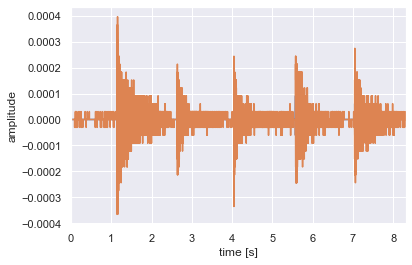

In [221]:
snd = parselmouth.Sound("test2.wav")
plt.figure()
plt.plot(snd.xs(), snd.values.T)
plt.xlim([snd.xmin, snd.xmax])
plt.xlabel("time [s]")
plt.ylabel("amplitude")
plt.show() # or plt.savefig("sound.png"), or plt.savefig("sound.pdf")

Object type: Pitch
Object name: <no name>
Date: Sat Oct 26 23:25:04 2019

Time domain:
   Start time: 0 seconds
   End time: 8.311292517006803 seconds
   Total duration: 8.311292517006803 seconds
Time sampling:
   Number of frames: 166 (67 voiced)
   Time step: 0.05 seconds
   First frame centred at: 0.030646258503401393 seconds
Ceiling at: 1200 Hz

Estimated quantiles:
   10% = 262.979982 Hz = 214.933514 Mel = 16.7394358 semitones above 100 Hz = 6.61191907 ERB
   16% = 263.234985 Hz = 215.106003 Mel = 16.7562149 semitones above 100 Hz = 6.61668125 ERB
   50% = 332.621784 Hz = 260.138175 Mel = 20.8065919 semitones above 100 Hz = 7.83703196 ERB
   84% = 393.57416 Hz = 296.866176 Mel = 23.719626 semitones above 100 Hz = 8.80096122 ERB
   90% = 393.949256 Hz = 297.084773 Mel = 23.7361177 semitones above 100 Hz = 8.80661986 ERB

Estimated spreading:
   84%-median = 61.41 Hz = 37.01 Mel = 2.935 semitones = 0.9712 ERB
   median-16% = 69.91 Hz = 45.37 Mel = 4.081 semitones = 1.23 ERB
   90%-1

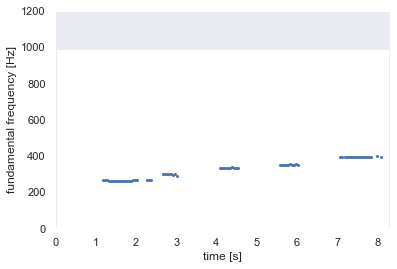

In [222]:
def draw_spectrogram(spectrogram, dynamic_range=70):
    X, Y = spectrogram.x_grid(), spectrogram.y_grid()
    sg_db = spectrogram.values
#10 * np.log10(spectrogram.values)
    plt.pcolormesh(X, Y, sg_db, vmin=sg_db.max() - dynamic_range, cmap='afmhot')
    plt.ylim([spectrogram.ymin, spectrogram.ymax])
    plt.xlabel("time [s]")
    plt.ylabel("frequency [Hz]")

def draw_pitch(pitch):
    # Extract selected pitch contour, and
    # replace unvoiced samples by NaN to not plot
    pitch_values = pitch.selected_array['frequency']
    pitch_values[pitch_values==0] = np.nan
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=5, color='w')
    plt.plot(pitch.xs(), pitch_values, 'o', markersize=2)
    plt.grid(False)
    plt.ylim(0, pitch.ceiling)
    plt.ylabel("fundamental frequency [Hz]")

    
##time step
time_step = 0.05
##--------

pre_emphasized_snd = snd.copy()
pre_emphasized_snd.pre_emphasize()
spectrogram = pre_emphasized_snd.to_spectrogram(window_length=time_step, maximum_frequency=1000)

pitch = snd.to_pitch(time_step=time_step)

pitch = parselmouth.Pitch.kill_octave_jumps(pitch)
print(pitch)

plt.figure()
draw_spectrogram(spectrogram)

draw_pitch(pitch)
plt.xlim([snd.xmin, snd.xmax])

plt.show() # or plt.savefig("spectrogram.pdf")

n_frames = parselmouth.Pitch.get_number_of_frames(pitch)

frames:: 2329
Object type: Spectrogram
Object name: <no name>
Date: Sat Oct 26 23:04:57 2019

Time domain:
   Start time: 0 seconds
   End time: 8.311292517006803 seconds
   Total duration: 8.311292517006803 seconds
Time sampling:
   Number of time slices (frames): 2329
   Time step (frame distance): 0.0035261848971734774 seconds
   First time slice (frame centre) at: 0.051167038193473006 seconds
Frequency domain:
   Lowest frequency: 0 Hz
   Highest frequency: 1000 Hz
   Total bandwidth: 1000 Hz
Frequency sampling:
   Number of frequency bands (bins): 61
   Frequency step (bin width): 16.14990234375 Hz
   First frequency band around (bin centre at): 5.38330078125 Hz

Object type: Pitch
Object name: <no name>
Date: Sat Oct 26 23:04:57 2019

Time domain:
   Start time: 0 seconds
   End time: 8.311292517006803 seconds
   Total duration: 8.311292517006803 seconds
Time sampling:
   Number of frames: 828 (430 voiced)
   Time step: 0.01 seconds
   First frame centred at: 0.020646258503402067

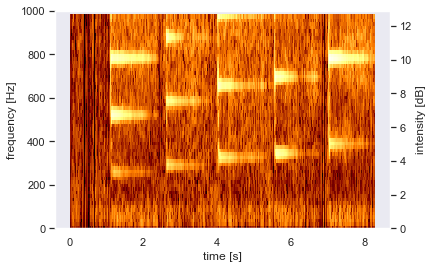

<Figure size 432x288 with 0 Axes>

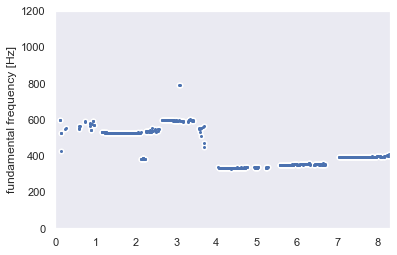

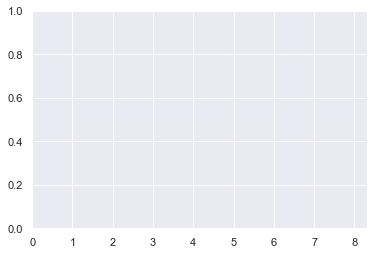

[[5.65866848e-07 1.30891947e-07 2.30176643e-08 ... 5.67541210e-06
  7.82280325e-06 7.94989714e-06]
 [8.69716368e-07 2.26369090e-07 4.76926383e-08 ... 4.85890136e-05
  4.17140265e-05 3.44153620e-05]
 [1.42815468e-06 4.07200522e-07 9.97573042e-08 ... 9.48447645e-05
  6.36907708e-05 3.44168563e-05]
 ...
 [7.99444785e-07 3.07278479e-07 9.76353613e-08 ... 5.60186089e-05
  4.79015258e-05 3.97059365e-05]
 [1.01634837e-06 3.93686114e-07 1.23504571e-07 ... 2.78124008e-05
  2.44433908e-05 2.40269265e-05]
 [1.13241420e-06 4.52790763e-07 1.41568496e-07 ... 4.23642599e-05
  3.17494957e-05 2.60871516e-05]]


In [129]:
draw_pitch(pitch)
plt.xlim([snd.xmin, snd.xmax])
plt.show()

plt.xlim([snd.xmin, snd.xmax])
plt.show() # or plt.savefig("spectrogram.pdf")
print(spectrogram.values)